<a href="https://colab.research.google.com/github/zzeeddd95/capstone-project/blob/master/Decisiontreeregressorapple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('bmh')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [217]:
from google.colab import files
apple = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [218]:
apple = pd.read_csv('AAPL.csv')
apple.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-27,35.799999,36.270000,35.587143,36.192856,31.332062,166570600
1,2010-05-28,37.055714,37.057144,36.192856,36.697144,31.768623,203903700
2,2010-06-01,37.098572,37.991428,36.994286,37.261429,32.257130,219118200
3,2010-06-02,37.791428,37.828571,37.189999,37.707142,32.642975,172137000
4,2010-06-03,37.882858,37.935715,37.201427,37.588570,32.540325,162526700
5,2010-06-04,36.887142,37.414288,36.375713,36.565716,31.654835,189576100


In [240]:
apple.shape

(2516, 2)

In [219]:
#Filter out data to only obtain close price (independant variable)
apple = apple[['Close']]
apple

,Close
0,36.192856
1,36.697144
2,37.261429
3,37.707142
4,37.588570
...,...
2511,313.140015
2512,319.230011
2513,316.850006
2514,318.890015


In [195]:
#Create a variable to allow for predicting 'n days' into the future
future_out =30

In [221]:
#Create the dependant variable which will be shifted 'n' units up
apple['Prediction'] = apple[['Close']].shift(-future_out)
apple.tail()

,Close,Prediction
2511,313.140015,NaN
2512,319.230011,NaN
2513,316.850006,NaN
2514,318.890015,NaN
2515,316.730011,NaN


In [222]:
#create independant data set by converting the dataframe to a numpy array
appledfx = np.array(apple.drop(['Prediction'],1))
#Renove the last 'n' rows
appledfx = appledfx[:-future_out] #therefore for every column, all of the rows will be displayed - future out
appledfx

array([[ 36.192856],
       [ 36.697144],
       [ 37.261429],
       ...,
       [266.070007],
       [267.98999 ],
       [273.25    ]])

In [223]:
#creat dependant dataset (prediction), all values including any Nan's
appledfy = np.array(apple['Prediction'])
#Filter this data by obtaining all values except the last 'n' rows
appledfy = appledfy[:-future_out]
print(appledfy)

[ 36.755714  35.971428  36.104286 ... 316.850006 318.890015 316.730011]


In [224]:
#split data into 80% training and 20%testing
appledfx_train , appledfx_test, appledfy_train, appledfy_test = train_test_split(appledfx, appledfy, test_size = 0.2)

In [229]:
#Create and train the decision tree regressor model
tree = DecisionTreeRegressor().fit(appledfx_train,appledfy_train)

In [230]:
#test model accuracy via score which returns the coefficient of determination (R^2) of prediction
treeconfidence = tree.score(appledfx_test, appledfy_test)
print("Decision tree regressor confidence", treeconfidence)

Decision tree regressor confidence 0.9287205685503943


In [231]:
#set apple_forecast = to the last 30 rows of original dataset from close price column
apple_forecast = np.array(apple.drop(['Prediction'],1))[-future_out:]
print(apple_forecast)


[[287.049988]
 [284.429993]
 [286.690002]
 [282.799988]
 [276.929993]
 [268.369995]
 [276.100006]
 [275.029999]
 [282.970001]
 [283.170013]
 [278.579987]
 [287.730011]
 [293.799988]
 [289.070007]
 [293.160004]
 [297.559998]
 [300.630005]
 [303.73999 ]
 [310.130005]
 [315.01001 ]
 [311.410004]
 [307.649994]
 [309.540009]
 [307.709991]
 [314.959991]
 [313.140015]
 [319.230011]
 [316.850006]
 [318.890015]
 [316.730011]]


In [234]:
#Print decision tree predicted values for upcoming 'n' days
treeprediction = tree.predict(apple_forecast)
print(treeprediction)

[259.429993 320.029999 276.100006 320.029999 275.029999 318.309998
 275.029999 324.339996 320.029999 320.029999 308.660004 259.429993
 282.799988 276.929993 282.799988 319.       324.950012 313.049988
 288.079987 298.809998 273.359985 285.339996 242.210007 285.339996
 298.809998 241.410004 289.029999 292.649994 246.669998 302.73999 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


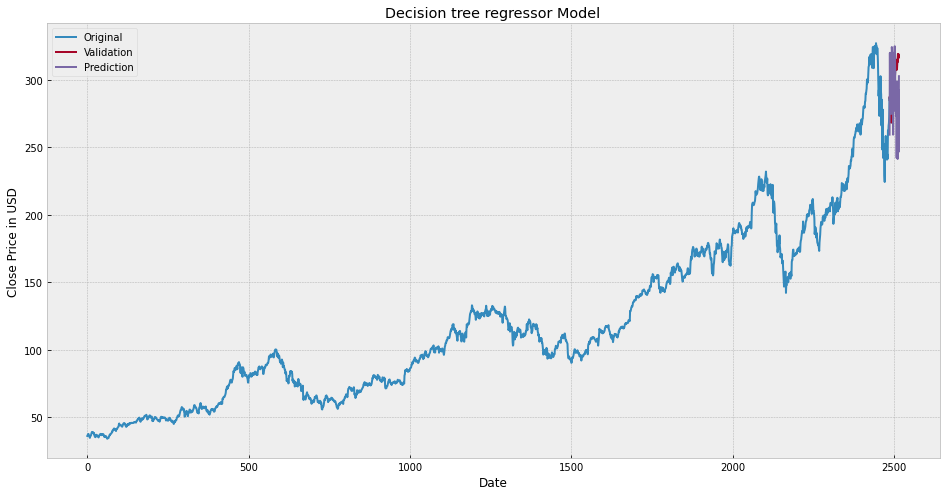

In [239]:
prediction = treeprediction
valid['Prediction'] = apple[appledfx.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize = (16,8))
plt.title ('Decision tree regressor Model')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.plot(apple['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','Validation','Prediction'])
plt.show()